In [ ]:
#load our libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
train = pd.read_csv('/content/sign_mnist_train.csv.zip')
test = pd.read_csv('/content/sign_mnist_test.csv.zip')


In [ ]:
#datasets as numpy arrays
import numpy as np
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')



In [ ]:
np.shape(train_data) 


(27455, 785)

In [ ]:

np.shape(test_data)

(7172, 785)

In [ ]:
#defining class labels to make it easier for us to understand
Class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
               

Label for the image is:  C


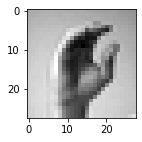

In [ ]:
#Check this works by plotting a few images and labels
i = random.randint(1, train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap ='gray')
print( "Label for the image is: ", Class_names[int(train_data[i,0])])


Text(0.5, 1.0, 'Label')

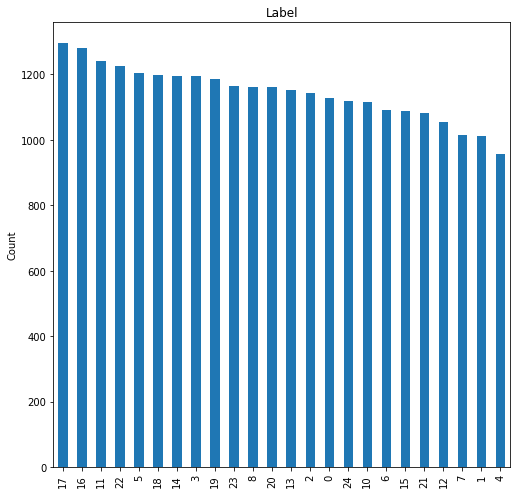

In [ ]:
#data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [ ]:
x_train = train_data[:,1:]/255
x_test = test_data[:,1:]/255

In [ ]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [ ]:
y_test = test_data[:, 0]
y_test_cat = to_categorical(y_test, num_classes =25)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [ ]:

#Model
model = Sequential()


In [ ]:
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['acc'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
history = model.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 26s 116ms/step - loss: 2.7716 - acc: 0.1545 - val_loss: 1.9234 - val_acc: 0.3834
Epoch 2/10
215/215 [==============================] - 25s 115ms/step - loss: 1.4074 - acc: 0.5318 - val_loss: 0.9366 - val_acc: 0.6976
Epoch 3/10
215/215 [==============================] - 25s 115ms/step - loss: 0.8455 - acc: 0.7112 - val_loss: 0.6434 - val_acc: 0.7814
Epoch 4/10
215/215 [==============================] - 25s 114ms/step - loss: 0.5743 - acc: 0.8031 - val_loss: 0.4835 - val_acc: 0.8313
Epoch 5/10
215/215 [==============================] - 25s 115ms/step - loss: 0.4083 - acc: 0.8617 - val_loss: 0.3687 - val_acc: 0.8709
Epoch 6/10
215/215 [==============================] - 25s 114ms/step - loss: 0.3101 - acc: 0.8950 - val_loss: 0.2851 - val_acc: 0.8996
Epoch 7/10
215/215 [==============================] - 25s 115ms/step - loss: 0.2374 - acc: 0.9201 - val_loss: 0.2693 - val_acc: 0.9110
Epoch 8/10
215/215 [==============================] - 2

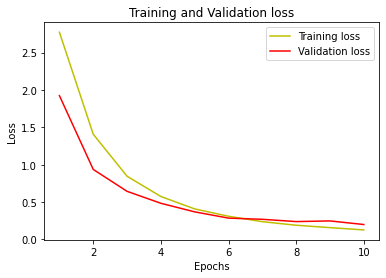

In [ ]:
#plotting the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc=history.history['acc']
val_acc = history.history['val_acc']

<function matplotlib.pyplot.show>

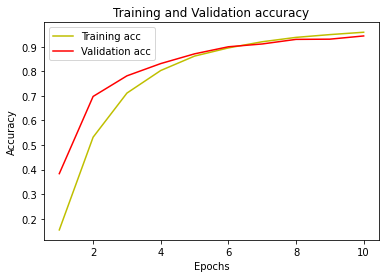

In [ ]:
plt.plot(epochs, acc, 'y', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label ='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show


In [ ]:
model=Sequential()
prediction = np.argmax(model.predict(x_test), axis=1)
prediction = np.squeeze(prediction, axis = 2)
prediction = prediction.flatten()
print(np.shape(prediction))





(200816,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

ValueError: ignored

In [ ]:
np.shape(y_test)

(7172,)

In [ ]:

i =random.randint(1, len(prediction))
plt.imshow(x_test[i,:,:,0])
print("Predicted Label: ", Class_names[int(prediction[i])])
print("True Label: ", Class_names[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 

